In [3]:
import numpy as np

In [4]:
landmarks_array = np.load(r"C:\Users\barrt\PycharmProjects\Gymalyze\src\data\pose_data.npy", allow_pickle=True)
labels_array = np.load(r"C:\Users\barrt\PycharmProjects\Gymalyze\src\data\pose_labels.npy", allow_pickle=True)

In [3]:
landmarks_array.shape

(153636,)

In [4]:
labels_array.shape

(153636,)

In [5]:
landmarks_array[0]

landmark {
  x: 0.491879344
  y: 0.357056379
  z: 0.324812621
  visibility: 0.999992132
}
landmark {
  x: 0.484865665
  y: 0.376111776
  z: 0.356128097
  visibility: 0.999993086
}
landmark {
  x: 0.486014068
  y: 0.378981471
  z: 0.355893403
  visibility: 0.999991298
}
landmark {
  x: 0.487113178
  y: 0.381590813
  z: 0.355997115
  visibility: 0.999994874
}
landmark {
  x: 0.480731815
  y: 0.374789715
  z: 0.334106892
  visibility: 0.999995708
}
landmark {
  x: 0.479086488
  y: 0.376639277
  z: 0.333755434
  visibility: 0.999995828
}
landmark {
  x: 0.477594316
  y: 0.377863377
  z: 0.333740324
  visibility: 0.999995708
}
landmark {
  x: 0.491375029
  y: 0.392968148
  z: 0.43746376
  visibility: 0.999996901
}
landmark {
  x: 0.479148954
  y: 0.388594955
  z: 0.334039062
  visibility: 0.999988914
}
landmark {
  x: 0.498527
  y: 0.361272
  z: 0.351936221
  visibility: 0.99998033
}
landmark {
  x: 0.493557096
  y: 0.359780133
  z: 0.320306659
  visibility: 0.999963164
}
landmark {
  x: 0.

In [16]:
labels_array[0]

'bench press'

In [17]:
labels_array[1]

'bench press'

In [19]:
labels_array[:1000]

array(['bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench press',
       'bench press', 'bench press', 'bench press', 'bench pre

In [5]:
import numpy as np
import json

def process_landmarks_and_labels(landmarks_array, labels_array):
    new_landmarks_array = []
    new_labels_array = []
    label_mapping = {}
    label_counter = 0

    current_label = labels_array[0]
    current_sequence = []

    for i, (landmarks_obj, label) in enumerate(zip(landmarks_array, labels_array)):
        if label != current_label:
            # When label changes, finalize the current sequence
            new_landmarks_array.append(current_sequence)
            new_labels_array.append(label_mapping[current_label])

            # Reset for the next label sequence
            current_label = label
            current_sequence = []

        # Access the landmarks using landmarks_obj.landmark if landmarks is a NormalizedLandmarkList object
        current_sequence.append([[lm.x, lm.y, lm.z, lm.visibility] for lm in landmarks_obj.landmark])

        # Add the label to the mapping if not already present
        if label not in label_mapping:
            label_mapping[label] = label_counter
            label_counter += 1

    # Don't forget to add the last sequence
    new_landmarks_array.append(current_sequence)
    new_labels_array.append(label_mapping[current_label])

    return np.array(new_landmarks_array, dtype=object), np.array(new_labels_array), label_mapping

# Call the function to process the arrays
new_landmarks_array, new_labels_array, label_mapping = process_landmarks_and_labels(landmarks_array, labels_array)

# Save the label mapping to a JSON file
with open("label_mapping.json", "w") as f:
    json.dump(label_mapping, f)

# Save the new arrays as numpy files
np.save("new_landmarks_array.npy", new_landmarks_array)
np.save("labels_data.npy", new_labels_array)

print("Processing complete and files saved.")


Processing complete and files saved.


In [7]:
new_landmarks_array.shape

(761,)

In [8]:
new_labels_array.shape

(761,)

In [28]:
for i in range(10):
    print(len(new_landmarks_array[i]))

86
75
59
234
300
61
150
210
93
74


In [29]:
for i in range(10):
    print(new_labels_array[i])

0
1
2
1
3
0
4
5
4
6


In [35]:
len(new_landmarks_array[0][0])

33

In [40]:
all(len(landmark) == 33 for sequence in new_landmarks_array for landmark in sequence)


True

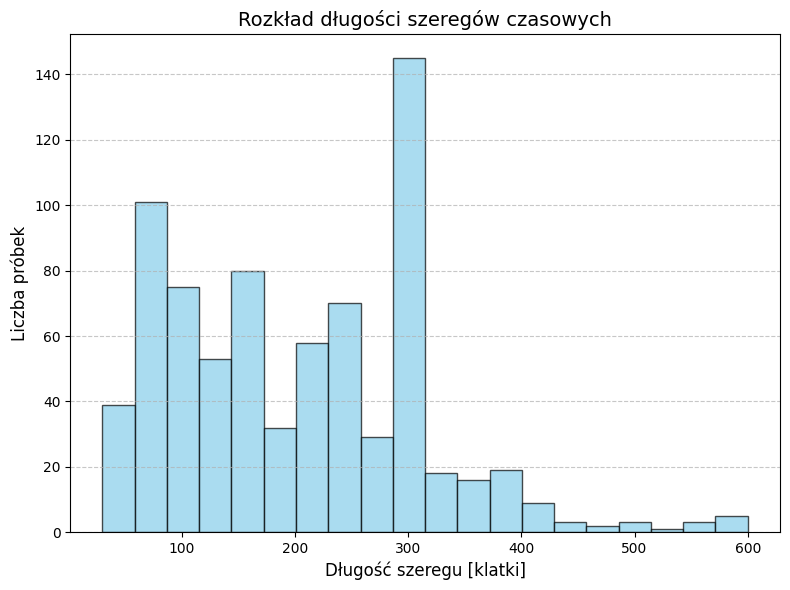

In [17]:
import matplotlib.pyplot as plt

# Step 1: Calculate lengths
sequence_lengths = [len(sequence) for sequence in new_landmarks_array]

# Step 2: Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(sequence_lengths, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Opisy osi
plt.xlabel('Długość szeregu [klatki]', fontsize=12)
plt.ylabel('Liczba próbek', fontsize=12)

# Tytuł
plt.title('Rozkład długości szeregów czasowych', fontsize=14)

# Siatka
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Estetyka i zapisywanie
plt.tight_layout()
plt.savefig("lenght_of_time_series.png", dpi=300)
plt.show()


In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Step 1: Calculate lengths
sequence_lengths = [len(sequence) for sequence in new_landmarks_array]

# Step 2: Determine the most common sequence length
most_common_length = Counter(sequence_lengths).most_common(1)[0][0]

print(f"The most common sequence length is {most_common_length}.")


The most common sequence length is 300.


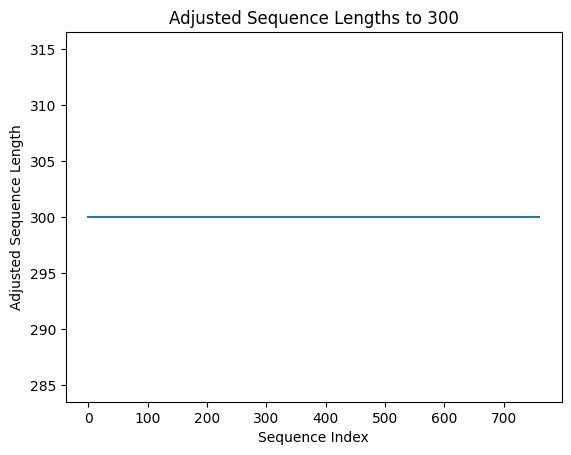

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Step 1: Set the target length
target_length = 300

# Step 2: Adjust all sequences to the length of 300 using interpolation
adjusted_sequences = []
for sequence in new_landmarks_array:
    original_length = len(sequence)
    x_original = np.linspace(0, 1, original_length)
    x_new = np.linspace(0, 1, target_length)

    interpolated_sequence = []
    for i in range(len(sequence[0])):  # Interpolate x, y, z, visibility separately
        frame_values = np.array([frame[i] for frame in sequence])
        f = interp1d(x_original, frame_values, kind='linear', axis=0, fill_value="extrapolate")
        interpolated_sequence.append(f(x_new))
    
    adjusted_sequences.append(np.array(interpolated_sequence).transpose(1, 0, 2))

# Step 3: Plot the adjusted sequence lengths
adjusted_sequence_lengths = [len(sequence) for sequence in adjusted_sequences]
plt.plot(adjusted_sequence_lengths)
plt.xlabel('Sequence Index')
plt.ylabel('Adjusted Sequence Length')
plt.title('Adjusted Sequence Lengths to 300')
plt.show()

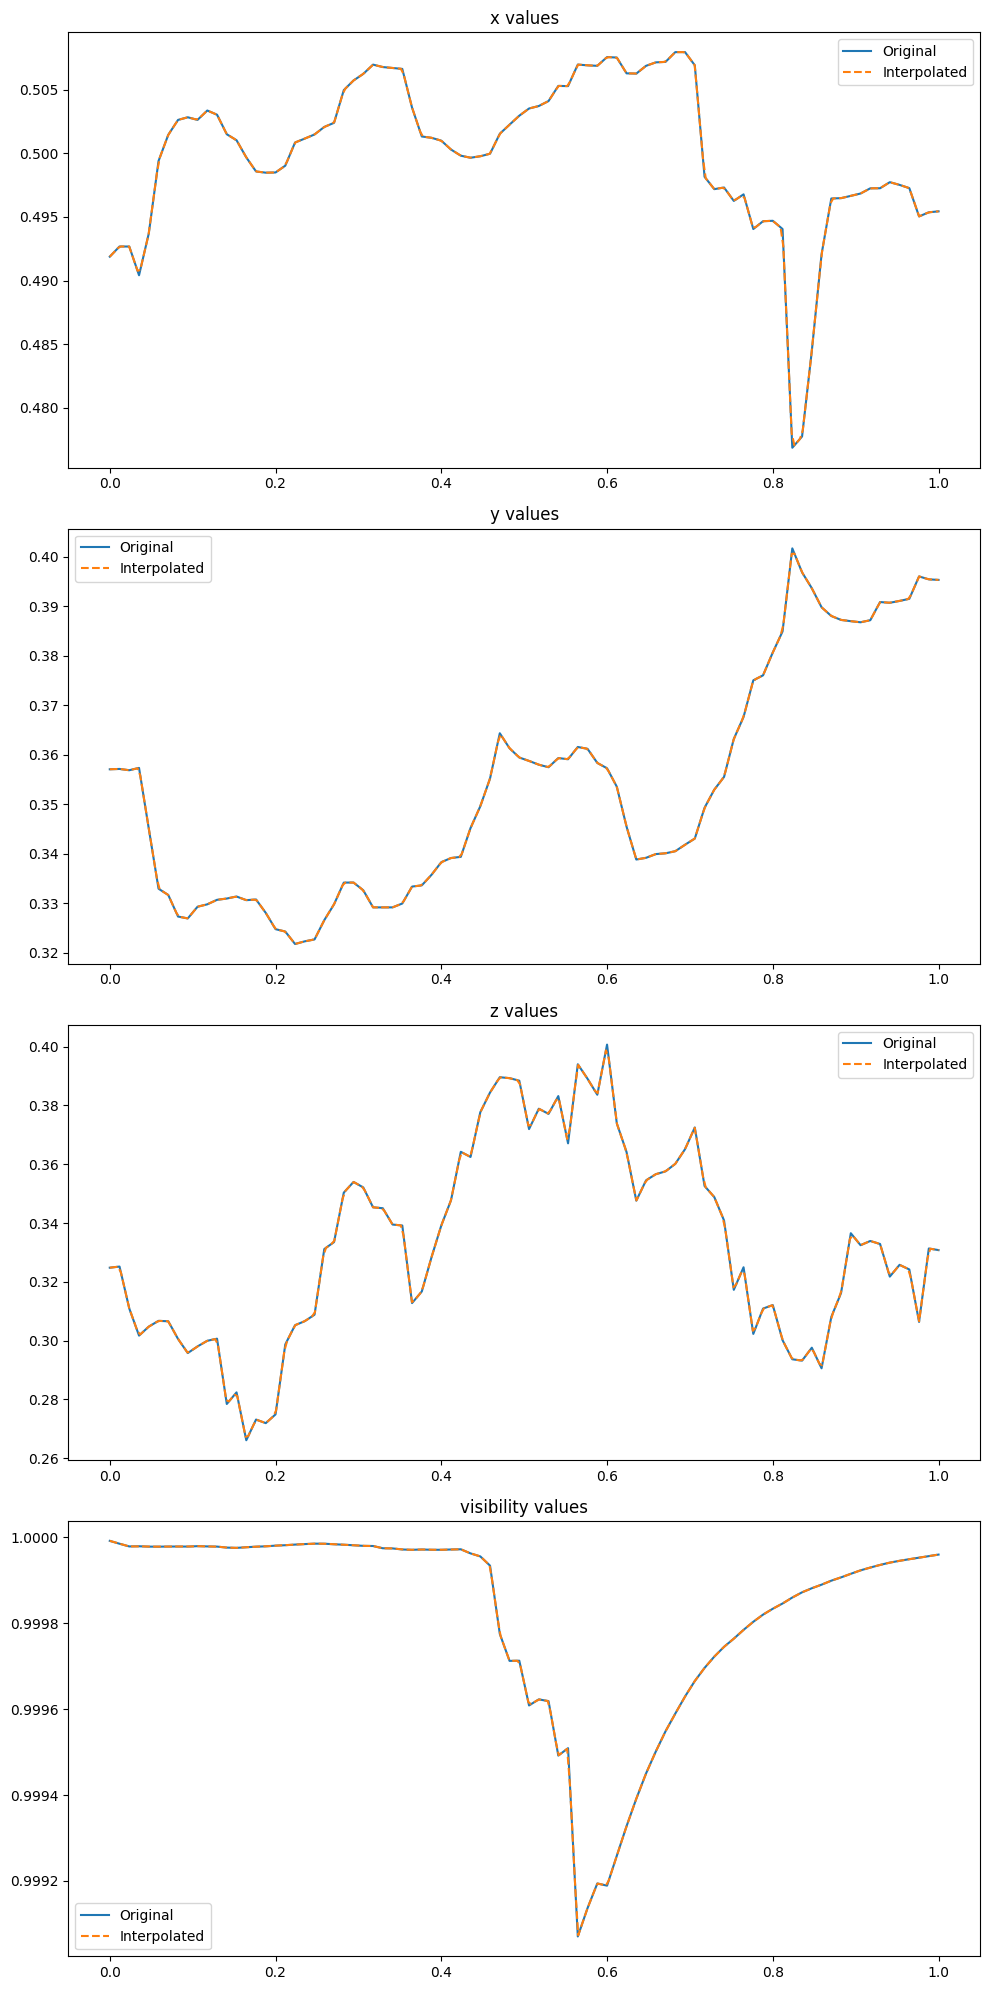

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Step 1: Set the target length
target_length = 300

# Step 2: Select a sequence to plot
sequence = new_landmarks_array[0]
original_length = len(sequence)
x_original = np.linspace(0, 1, original_length)
x_new = np.linspace(0, 1, target_length)

# Step 3: Extract and interpolate x, y, z, visibility values for one landmark
landmark_index = 0  # Choose the first landmark
original_values = np.array(sequence)[:, landmark_index, :]
interpolated_values = []

for i in range(4):  # Interpolate x, y, z, visibility separately
    frame_values = original_values[:, i]
    f = interp1d(x_original, frame_values, kind='linear', fill_value="extrapolate")
    interpolated_values.append(f(x_new))

interpolated_values = np.array(interpolated_values).T

# Step 4: Plot the original and interpolated values
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

labels = ['x', 'y', 'z', 'visibility']
for i in range(4):
    axs[i].plot(x_original, original_values[:, i], label='Original')
    axs[i].plot(x_new, interpolated_values[:, i], label='Interpolated', linestyle='--')
    axs[i].set_title(f'{labels[i]} values')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [59]:
all(len(sequence) == 300 for sequence in adjusted_sequences)

True

In [63]:
import numpy as np
new_landmarks_array = np.load('adjusted_sequences.npy', allow_pickle=True)

# Flatten each frame in the sequences
flattened_sequences = []
for sequence in new_landmarks_array:
    flattened_sequence = [np.array(frame).flatten() for frame in sequence]
    flattened_sequences.append(flattened_sequence)

flattened_sequences = np.array(flattened_sequences, dtype=object)


In [64]:
flattened_sequences.shape

(761, 300, 132)

In [65]:
np.save('landmarks_data.npy', flattened_sequences)

In [68]:
import numpy as np
labels_array = np.load('labels_data.npy', allow_pickle=True)
labels_array = labels_array.reshape(-1, 1)
labels_array.shape

(761, 1)

In [69]:
np.save('labels_data.npy', labels_array)
